In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import Optimizer
from skopt.space import Real
from skopt.benchmarks import branin

In [2]:
# 1️⃣ Objective function
objective = branin

# 2️⃣ Define search space
space = [
    Real(-5.0, 10.0),  # x1
    Real(0.0, 15.0)    # x2
]

# 3️⃣ Initialize Optimizer
opt = Optimizer(
    dimensions=space,
    base_estimator="GP",    # Gaussian Process
    acq_func="EI",          # Expected Improvement
    random_state=42
)

In [3]:
# 4️⃣ Run Batch Bayesian Optimization
n_iterations = 20
batch_size = 3

X_total = []
y_total = []

for i in range(n_iterations):
    X_batch = opt.ask(n_points=batch_size)
    y_batch = [objective(x) for x in X_batch]
    opt.tell(X_batch, y_batch)
    
    X_total.extend(X_batch)
    y_total.extend(y_batch)
    
    print(f"Iteration {i+1}/{n_iterations} - Best value so far: {np.min(y_total):.5f}")

Iteration 1/20 - Best value so far: 8.05003
Iteration 2/20 - Best value so far: 8.05003
Iteration 3/20 - Best value so far: 8.05003
Iteration 4/20 - Best value so far: 2.43476
Iteration 5/20 - Best value so far: 2.03516
Iteration 6/20 - Best value so far: 2.03516
Iteration 7/20 - Best value so far: 0.56109
Iteration 8/20 - Best value so far: 0.56109
Iteration 9/20 - Best value so far: 0.41087
Iteration 10/20 - Best value so far: 0.40097
Iteration 11/20 - Best value so far: 0.40097
Iteration 12/20 - Best value so far: 0.39806
Iteration 13/20 - Best value so far: 0.39806
Iteration 14/20 - Best value so far: 0.39794
Iteration 15/20 - Best value so far: 0.39794
Iteration 16/20 - Best value so far: 0.39794
Iteration 17/20 - Best value so far: 0.39794
Iteration 18/20 - Best value so far: 0.39794
Iteration 19/20 - Best value so far: 0.39794
Iteration 20/20 - Best value so far: 0.39794


In [4]:
# Convert to numpy arrays
X_total = np.array(X_total)
y_total = np.array(y_total)

# 5️⃣ Plot Branin function surface + evaluated points
x1 = np.linspace(-5.0, 10.0, 200)
x2 = np.linspace(0.0, 15.0, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[objective([x1_, x2_]) for x1_, x2_ in zip(row_x1, row_x2)]
              for row_x1, row_x2 in zip(X1, X2)])

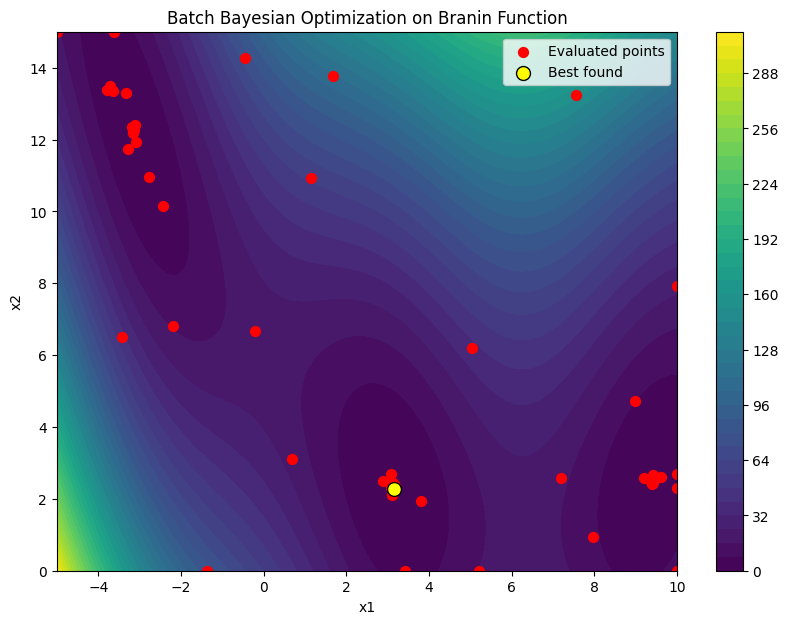

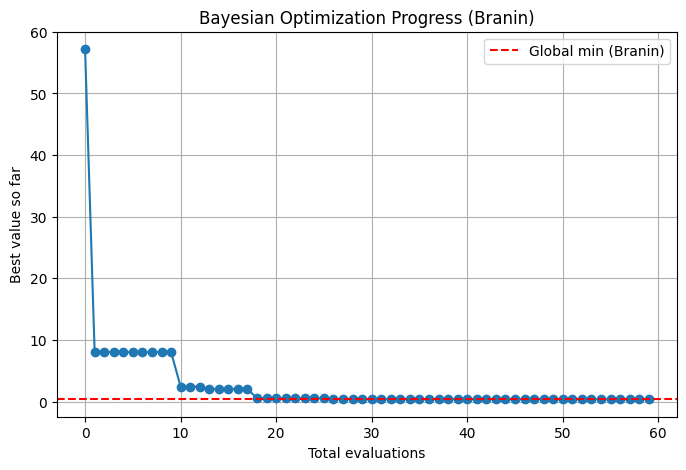

In [5]:
# Plot surface
plt.figure(figsize=(10, 7))
cp = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(cp)

# Plot evaluated points
plt.scatter(X_total[:, 0], X_total[:, 1], c='red', s=50, label='Evaluated points')
best_idx = np.argmin(y_total)
plt.scatter(X_total[best_idx, 0], X_total[best_idx, 1], c='yellow', s=100, edgecolor='black', label='Best found')

# Labels
plt.title("Batch Bayesian Optimization on Branin Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# 6️⃣ Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(np.minimum.accumulate(y_total), marker='o')
plt.axhline(y=0.397887, color='r', linestyle='--', label='Global min (Branin)')
plt.xlabel("Total evaluations")
plt.ylabel("Best value so far")
plt.title("Bayesian Optimization Progress (Branin)")
plt.legend()
plt.grid(True)
plt.show()
